In [ ]:
import numpy as np
import cv2 as cv
def is_N4(f,x1,y1,x2,y2):
  # Check if pixel (x2,y2) is a 4-neighbor of pixel (x1,y1) in image f
  row,col = f.shape
  if x1 not in range(row) or x2 not in range(row) or y1 not in range(col) or y2 not in range(col):
    return False
  if (abs(x2-x1) + abs(y2-y1)) == 1:
    return True
  return False 

def is_Nd(f,x1,y1,x2,y2):
  # Check if pixel (x2,y2) is diagonal-neighbor of pixel (x1,y1) in image f
  row,col = f.shape
  if x1 not in range(row) or x2 not in range(row) or y1 not in range(col) or y2 not in range(col):
    return False 
  if (abs(x2-x1)==1 and abs(y2-y1)) == 1:
    return True
  return False  

def is_N8(f,x1,y1,x2,y2):
  # Check if pixel (x2,y2) is a 8-neighbor of pixel (x1,y1) in image f
  row,col = f.shape
  if x1 not in range(row) or x2 not in range(row) or y1 not in range(col) or y2 not in range(col):
    return False 
  if is_N4(f,x1,y1,x2,y2):
    return True
  if is_Nd(f,x1,y1,x2,y2):
    return True
  return False  

def is_4_adjacent(f,x1,y1,x2,y2,V):
  # Check if pixel (x1,y1) and (x2,y2) are 4-adjacent in image f
  # V is the set of gray-level values, subset of {0,..,255}
  if not is_N4(f,x1,y1,x2,y2):
    return False 
  if f[x1,y1] in V and f[x2,y2] in V:
    return True
  return False  

def is_8_adjacent(f,x1,y1,x2,y2,V):
  # Check if pixel (x1,y1) and (x2,y2) are 8-adjacent in image f
  # V is the set of gray-level values, subset of {0,..,255}
  if not is_N8(f,x1,y1,x2,y2):
    return False 
  if f[x1,y1] in V and f[x2,y2] in V:
    return True
  return False  

def is_m_adjacent(f,x1,y1,x2,y2,V):
  # Check if pixel (x1,y1) and (x2,y2) are m-adjacent in image f
  # V is the set of gray-level values, subset of {0,..,255}
  if is_N4(f,x1,y1,x2,y2):
    if f[x1,y1] in V and f[x2,y2] in V:
      return 1
    return False 
  if is_Nd(f,x1,y1,x2,y2):
    if f[x1,y1] in V and f[x2,y2] in V and f[x1,y2] not in V and f[x2,y1] not in V:
      return True
    return False 
  return False 

def is_on_border(f,x,y):
  if is_N8(f,x,y,x-1,y-1) and is_N8(f,x,y,x-1,y) and is_N8(f,x,y,x-1,y+1) and is_N8(f,x,y,x,y-1)\
  and is_N8(f,x,y,x,y+1) and is_N8(f,x,y,x+1,y-1) and is_N8(f,x,y,x+1,y) and is_N8(f,x,y,x+1,y+1):
    return False
  return True

def is_out_of_region(f,R,x,y):
  for i,j in R:
    if x==i and y==j:
      return False
  return True

def find_adjacent_pixels(f,x,y,V,type_adj="m"):
  A = np.empty((0,2), int)
  if type_adj == "4":
    if is_4_adjacent(f,x,y,x-1,y,V):
      A = np.append(A, [[x-1,y]], axis = 0) 
    if is_4_adjacent(f,x,y,x,y-1,V):
      A = np.append(A, [[x,y-1]], axis = 0)
    if is_4_adjacent(f,x,y,x,y+1,V):
      A = np.append(A, [[x,y+1]], axis = 0) 
    if is_4_adjacent(f,x,y,x+1,y,V):
      A = np.append(A, [[x+1,y]], axis = 0)
    return A
  if type_adj == "8":
    if is_8_adjacent(f,x,y,x-1,y-1,V):
      A = np.append(A, [[x-1,y-1]], axis = 0) 
    if is_8_adjacent(f,x,y,x-1,y,V):
      A = np.append(A, [[x-1,y]], axis = 0)
    if is_8_adjacent(f,x,y,x-1,y+1,V):
      A = np.append(A, [[x-1,y+1]], axis = 0)  
    if is_8_adjacent(f,x,y,x,y-1,V):
      A = np.append(A, [[x,y-1]], axis = 0)
    if is_8_adjacent(f,x,y,x,y+1,V):
      A = np.append(A, [[x,y+1]], axis = 0)
    if is_8_adjacent(f,x,y,x+1,y-1,V):
      A = np.append(A, [[x+1,y-1]], axis = 0) 
    if is_8_adjacent(f,x,y,x+1,y,V):
      A = np.append(A, [[x+1,y]], axis = 0) 
    if is_8_adjacent(f,x,y,x+1,y+1,V):
      A = np.append(A, [[x+1,y+1]], axis = 0) 
    return A
  if type_adj == "m":
    if is_m_adjacent(f,x,y,x-1,y-1,V):
      A = np.append(A, [[x-1,y-1]], axis = 0) 
    if is_m_adjacent(f,x,y,x-1,y,V):
      A = np.append(A, [[x-1,y]], axis = 0)
    if is_m_adjacent(f,x,y,x-1,y+1,V):
      A = np.append(A, [[x-1,y+1]], axis = 0)  
    if is_m_adjacent(f,x,y,x,y-1,V):
      A = np.append(A, [[x,y-1]], axis = 0) 
    if is_m_adjacent(f,x,y,x,y+1,V):
      A = np.append(A, [[x,y+1]], axis = 0)
    if is_m_adjacent(f,x,y,x+1,y-1,V):
      A = np.append(A, [[x+1,y-1]], axis = 0) 
    if is_m_adjacent(f,x,y,x+1,y,V):
      A = np.append(A, [[x+1,y]], axis = 0) 
    if is_m_adjacent(f,x,y,x+1,y+1,V):
      A = np.append(A, [[x+1,y+1]], axis = 0) 
    return A
def find_region(f,x,y,V,type_adj = "m"):
  R = np.empty((0,2), int)
  R = np.append(R, [[x,y]], axis = 0)
  Children = R
  while Children.shape[0] != 0:
    Parent = Children
    Children = np.empty((0,2), int)
    for xx,yy in Parent:
      A = find_adjacent_pixels(f,xx,yy,V,type_adj)
      for i,j in A:
        add = True
        for m,n in R:
          if m==i and n==j:
            add = False
        if add:
          Children = np.append(Children, [[i,j]], axis = 0)
          R = np.append(R, [[i,j]], axis = 0)
  return R




In [ ]:
# binary image fi
fi=np.array([[0,0,1,0,0],[1,1,0,0,1],[0,1,0,0,1],[1,0,1,0,1],[0,0,1,0,0]])
print("Image:")
print(fi)
# find all pixels that are adjacent pixel fi[1,1]
A = find_adjacent_pixels(fi,1,1,[1],type_adj="m")
print("all pixels that are adjacent pixel fi[1,1]")
print(A)
# find region has pixel fi[1,1]
Re = find_region(fi,1,1,[1],"m")
print("Region has pixel fi[1,1]:")
print(Re)

Image:
[[0 0 1 0 0]
 [1 1 0 0 1]
 [0 1 0 0 1]
 [1 0 1 0 1]
 [0 0 1 0 0]]
all pixels that are adjacent pixel fi[1,1]
[[0 2]
 [1 0]
 [2 1]]
Region has pixel fi[1,1]:
[[1 1]
 [0 2]
 [1 0]
 [2 1]
 [3 0]
 [3 2]
 [4 2]]


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
cd /content/drive/'My Drive'/20202-Image-Process

/content/drive/My Drive/20202-Image-Process


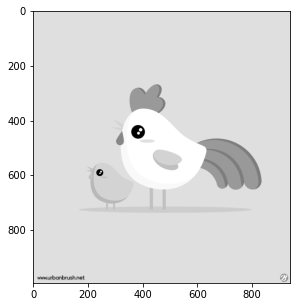

(1648, 2)


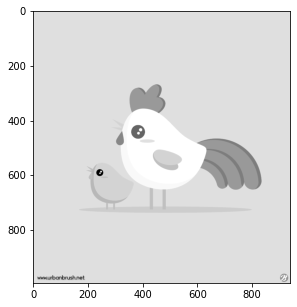

In [26]:
import cv2 as cv
from matplotlib import pyplot as plt
iname = "chick.png"
img = cv.imread(iname,0)
plt.figure(figsize = (5,5))
plt.imshow(img,cmap='gray', vmin = 0, vmax = 255)
plt.show()
img2 = img
R = find_region(img2,430,400,[0],"m")
print(R.shape)
for i, j in R:
  img2[i,j] = 100
plt.figure(figsize = (5,5))
plt.imshow(img2,cmap='gray', vmin = 0, vmax = 255)
plt.show()